# Utility function to collect the google satellite images given the lattitude and longitude using google MapStatic API.

In [ ]:
# API KEY to collect the images. The utilization of each API call using the below API_KEY will be charged.

API_KEY = "*** Please insert Google MAP STATICK API KEY ***"

In [12]:
import requests
import os

# constants
IMAGE_WIDTH = 288
IMAGE_HEIGHT = 288

def save_satellite_image(lat, lon, zoom=20, api_key=None, street_name = None, output_dir=None):
    """
    Saves a satellite image from Google Map Static API based on latitude and longitude.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        zoom (int, optional): Zoom level (default is 20).
        api_key (str, optional): Your Google Maps API key (if required).
        street_name (str, optional): To keep track of the point (lat,lon) (which street it belongs to).
        output_dir (str, optional): Directory to save the image (default is "satellite_images").

    Returns:
        str: Path to the saved image. 
        if succeed, returns and prints the path to saved image.
        else prints an error message.
    """
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Construct the API URL
    base_url = "https://maps.googleapis.com/maps/api/staticmap"
    params = {
        "center": f"{lat},{lon}",
        "zoom": zoom,
        "size": f"{IMAGE_WIDTH}x{IMAGE_HEIGHT}",
        "maptype": "satellite",
        "key": api_key,
    }

    # Make the API request
    response = requests.get(base_url, params=params)

    #Check the response status
    if response.status_code == 200:
        # Save the image
        image_path = os.path.join(output_dir, f"satellite_{lat}_{lon}_{street_name}.png")
        with open(image_path, "wb") as f:
            f.write(response.content)
        print(f"Satellite image saved as {image_path}")
        return image_path
    else:
        print(f"Error fetching the image. Status code: {response.status_code}")


## wrapper cell only used if the CSV has coordinates 
## in xcoord and ycoord

In [29]:
import pandas as pd
import os

HOME = os.getcwd()

fname = 'SamplePHil_DWNTWN_1_points_on_streets_with_geoInfo.csv'

df = pd.read_csv(os.path.join(HOME, "..\\..\\data\\{}".format(fname)))

df1 = df.dropna()[['ycoord','xcoord','name']]
image_names = []
for index in df1.index:
    lon = df1['ycoord'][index]
    lat = df1['xcoord'][index]
    str = df1['name'][index]
    street_name = "".join(str.split())+f"_{index}"

    image_path = save_satellite_image( lon, lat, zoom=20, api_key=API_KEY, street_name = street_name, output_dir="../../data/{}/satellite_images".format(fname.split('.')[0]))

    image_names.append(os.path.basename(image_path))
    # below break is added to check before running full sweep of the points to collect the images.
    # please comment the two lines before being run for the entire data points.


df1["image_name"] = image_names

# CSV file with the original content and image names
df1.to_csv(os.path.join(HOME, "..\\..\\data\\{}\\{}_inames.csv".format(fname.split(".")[0],fname.split(".")[0])))


Satellite image saved as ../../data/SamplePHil_DWNTWN_1_points_on_streets_with_geoInfo1/satellite_images\satellite_39.9525908_-75.1484825_NorthIndependenceMallEast_0.png
Satellite image saved as ../../data/SamplePHil_DWNTWN_1_points_on_streets_with_geoInfo1/satellite_images\satellite_39.95288476_-75.14842308_NorthIndependenceMallEast_1.png
Satellite image saved as ../../data/SamplePHil_DWNTWN_1_points_on_streets_with_geoInfo1/satellite_images\satellite_39.9492774_-75.1453782_BoudineStreet_2.png
Satellite image saved as ../../data/SamplePHil_DWNTWN_1_points_on_streets_with_geoInfo1/satellite_images\satellite_39.94957073_-75.14531531_BoudineStreet_3.png
Satellite image saved as ../../data/SamplePHil_DWNTWN_1_points_on_streets_with_geoInfo1/satellite_images\satellite_39.94986407_-75.14525242_BoudineStreet_4.png
Satellite image saved as ../../data/SamplePHil_DWNTWN_1_points_on_streets_with_geoInfo1/satellite_images\satellite_39.9503257_-75.1472643_South4thStreet_5.png
Satellite image saved

In [30]:
df1

ycoord     xcoord                          name  \
0   39.952591 -75.148483  North Independence Mall East   
1   39.952885 -75.148423  North Independence Mall East   
2   39.949277 -75.145378                Boudine Street   
3   39.949571 -75.145315                Boudine Street   
4   39.949864 -75.145252                Boudine Street   
5   39.950326 -75.147264              South 4th Street   
6   39.950035 -75.147336              South 4th Street   
7   39.949741 -75.147399              South 4th Street   
8   39.949447 -75.147458              South 4th Street   
9   39.949153 -75.147514              South 4th Street   
10  39.948860 -75.147577              South 4th Street   
11  39.946280 -75.147387                 Bingham Court   
12  39.946323 -75.147684                 Bingham Court   
13  39.946104 -75.147803                 Bingham Court   

                                           image_name  
0   satellite_39.9525908_-75.1484825_NorthIndepend...  
1   satellite_39.95288476_-75.14842308_NorthIndepe...  
2   satellite_39.9492774_-75.1453782_BoudineStreet...  
3   satellite_39.94957073_-75.14531531_BoudineStre...  
4   satellite_39.94986407_-75.14525242_BoudineStre...  
5   satellite_39.9503257_-75.1472643_South4thStree...  
6   satellite_39.9500346_-75.14733557_South4thStre...  
7   satellite_39.94974139_-75.14739905_South4thStr...  
8   satellite_39.94944748_-75.1474582_South4thStre...  
9   satellite_39.94915302_-75.14751386_South4thStr...  
10  satellite_39.94885978_-75.14757721_South4thStr...  
11  satellite_39.94628_-75.1473866_BinghamCourt_11...  
12  satellite_39.94632263_-75.14768355_BinghamCour...  
13  satellite_39.94610354_-75.14780299_BinghamCour...

## The follownig wrapper is used when the CSV data hash coordinates in
## latitude and longitude
### also this is the default automatic way of getting the aerial images

In [ ]:
import pandas as pd
import os

HOME = os.getcwd()

fname = 'interpolated_points.csv'

df = pd.read_csv(os.path.join(HOME, "..//..//data//osm_gpd//city_center_philly_roads//{}".format(fname)))

df2 = df.dropna()[['latitude','longitude','street_name']]
image_names = []
for index in df2.index:
    lon = df2['longitude'][index]
    lat = df2['latitude'][index]
    str = df2['street_name'][index]
    street_name = "".join(str.split())+f"_{index}"

    image_path = save_satellite_image( lon, lat, zoom=20, api_key=API_KEY, street_name = street_name, output_dir="../../data/{}/satellite_images".format(fname.split('.')[0]))

    image_names.append(os.path.basename(image_path))
    # below break is added to check before running full sweep of the points to collect the images.
    # please comment the two lines before being run for the entire data points.


df2["image_name"] = image_names

# CSV file with the original content and image names
df2.to_csv(os.path.join(HOME, "..//..//data/osm_gpd/city_center_philly_roads\\{}_inames.csv".format(fname.split(".")[0])))

In [40]:
df2

latitude  longitude        street_name                                         image_name
0    -75.154770  39.945738   South 8th Street  satellite_39.9457385_-75.1547702_South8thStree...
1    -75.147465  39.945940  Saint Josephs Way  satellite_39.9459403_-75.1474651_SaintJosephsW...
2    -75.147527  39.945647  Saint Josephs Way  satellite_39.94564675003432_-75.147526974207_S...
3    -75.147540  39.945584  Saint Josephs Way  satellite_39.945583681016174_-75.1475402635712...
4    -75.147478  39.945877  Saint Josephs Way  satellite_39.94587723221293_-75.14747839520537...
...         ...        ...                ...                                                ...
1227 -75.154387  39.954856   North 9th Street  satellite_39.95485583554676_-75.15438744635141...
1228 -75.148160  39.953600   North 5th Street  satellite_39.9535997_-75.1481598_North5thStree...
1229 -75.148034  39.953868   North 5th Street  satellite_39.95386847303765_-75.14803356998031...
1230 -75.147970  39.954162   North 5th Street  satellite_39.95416172249908_-75.14797028685955...
1231 -75.147907  39.954455   North 5th Street  satellite_39.95445503578311_-75.1479073012154_...

[1232 rows x 4 columns]

In [36]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2



def display_images_from_folder(folder_path):
    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    i = 0
    # Display each image
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
        plt.show()
        i= i+1;
        if i ==20:
            break;


def display_images_from_folder_10_per_row(folder_path):
    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    # Initialize variables for row and column
    rows = len(image_files) // 10 + 1
    cols = min(len(image_files), 10)

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

    # Iterate over image files and display them
    for i, image_file in enumerate(image_files):
        img = cv2.imread(os.path.join(folder_path, image_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        row, col = i // 10, i % 10
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        axes[row, col].set_title(image_file)

    # Hide empty subplots
    for i in range(len(image_files), rows * cols):
        axes[i // 10, i % 10].axis('off')

    plt.tight_layout()
    plt.show()

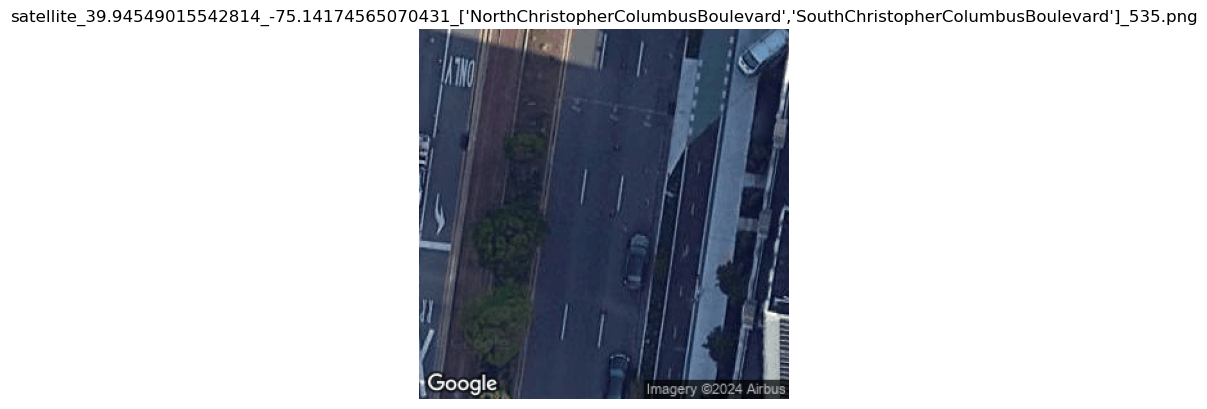

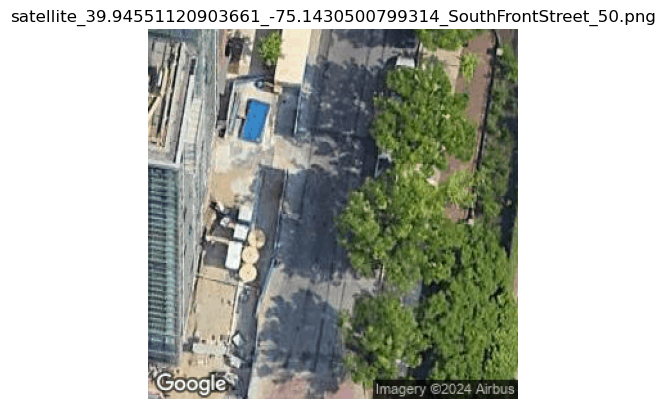

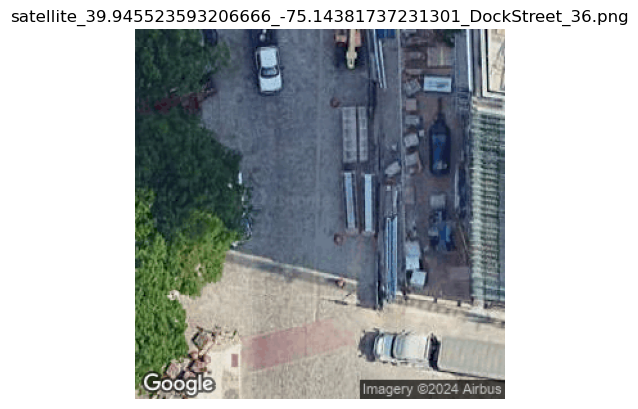

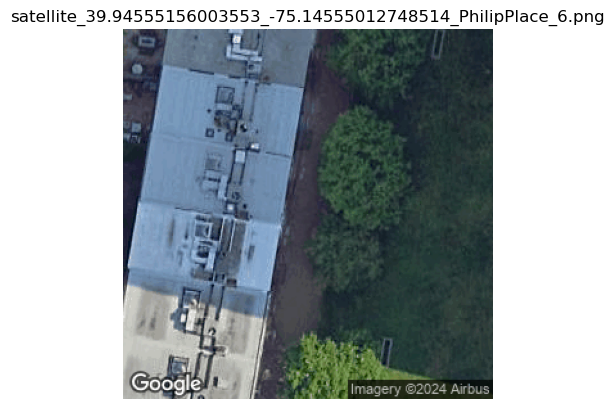

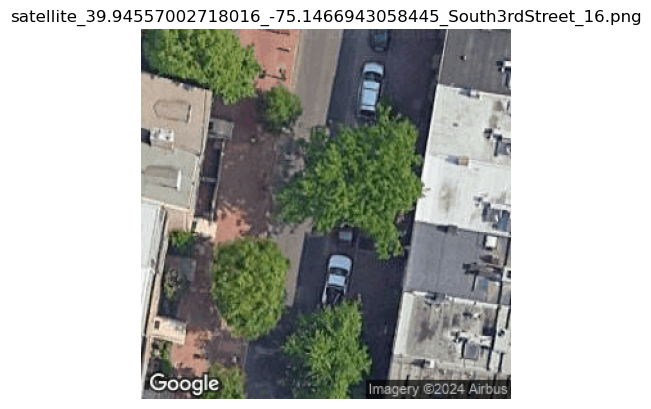

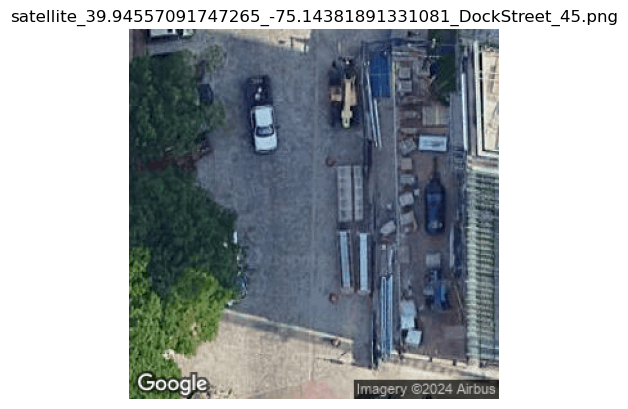

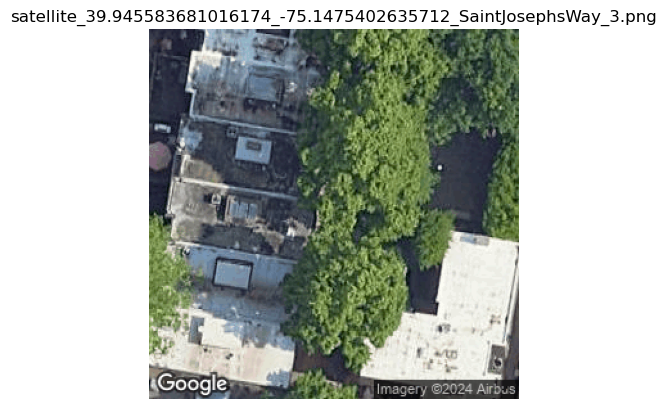

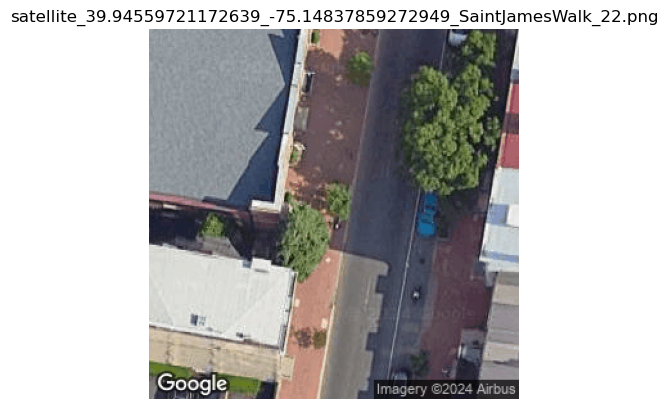

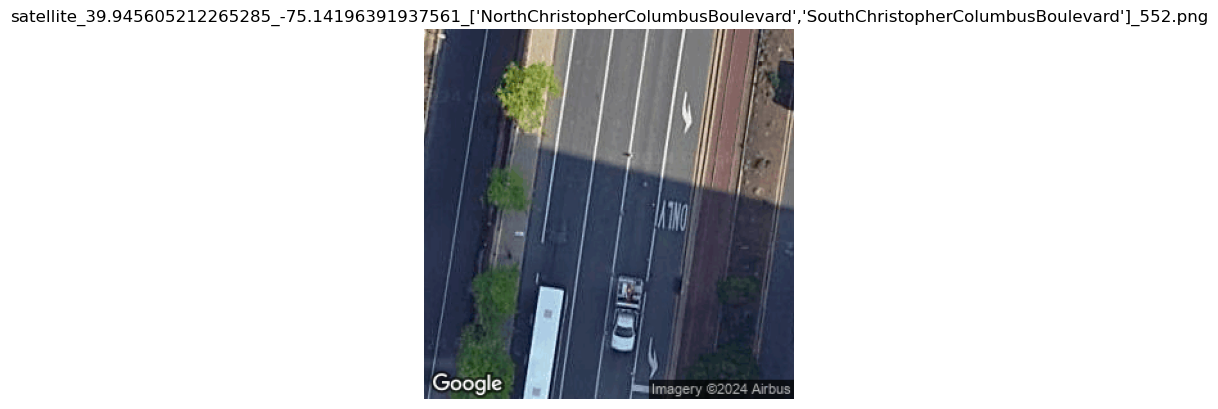

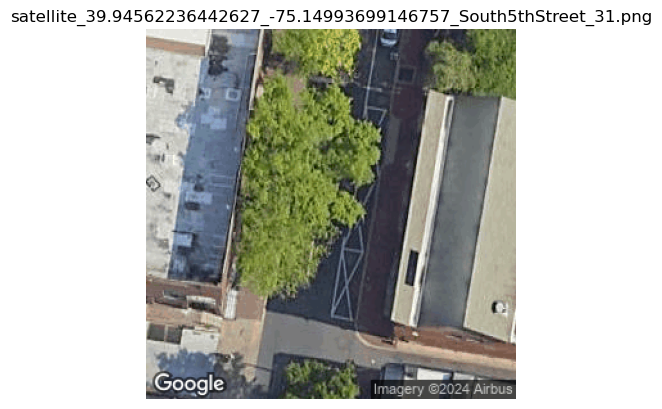

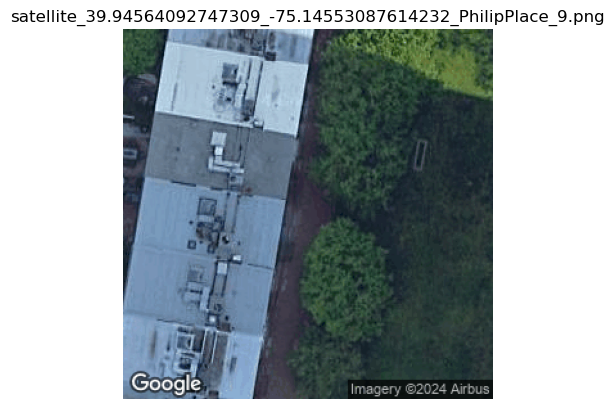

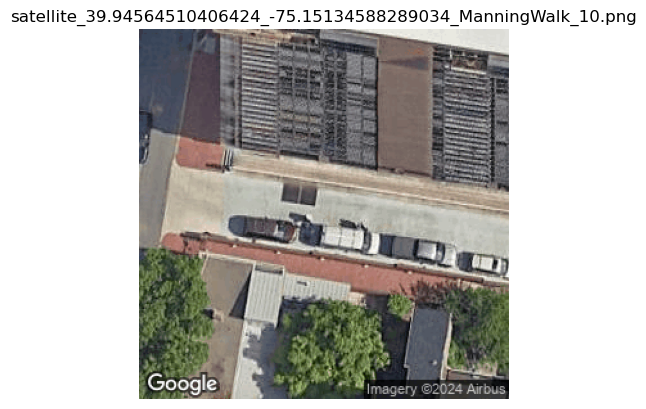

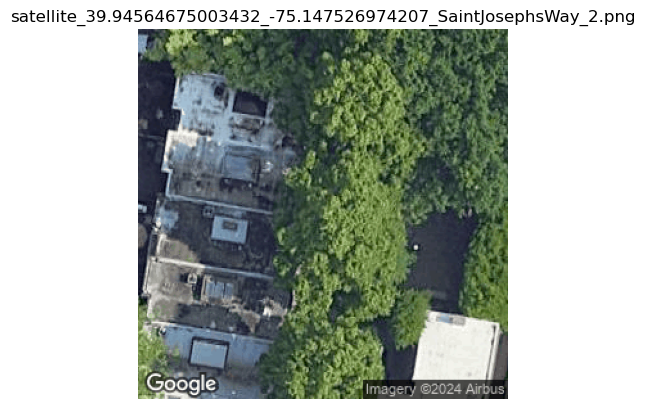

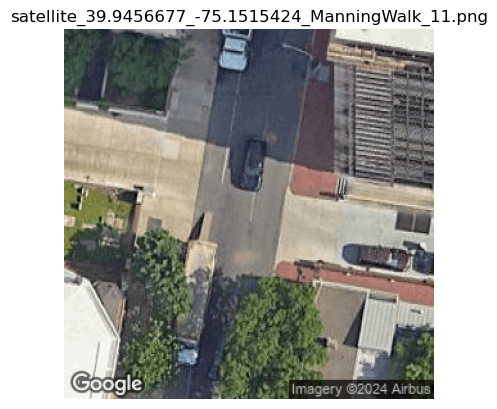

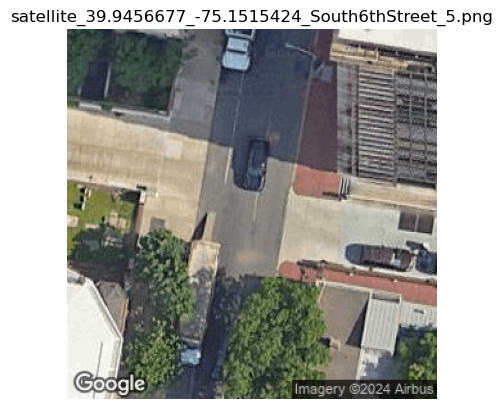

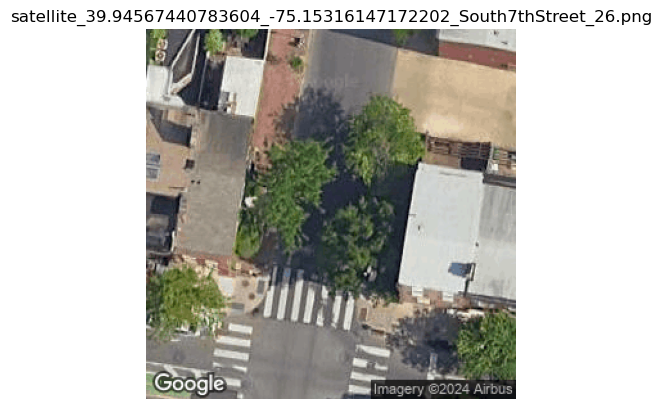

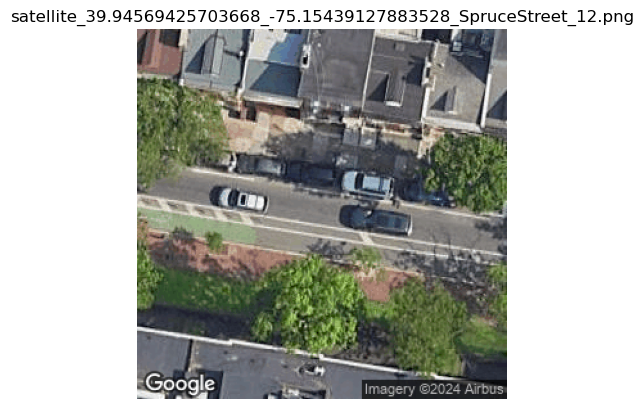

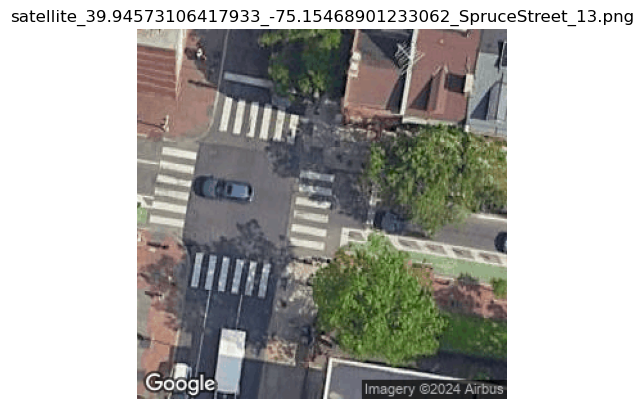

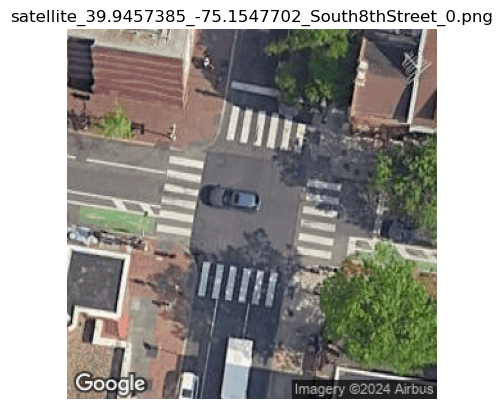

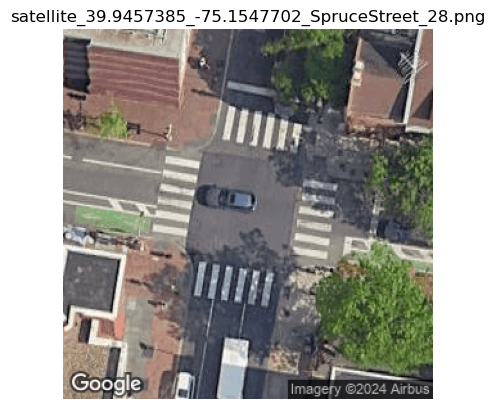

In [37]:
display_images_from_folder(os.path.join(HOME, "..\\..\\data\\interpolated_points\\satellite_images"))